In [1]:
import pandas as pd
from matplotlib import pyplot as plt

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
# from pandas import datetools as dtls

In [2]:
df = pd.read_csv("flexibleEnergyByDayByHour.csv")

In [3]:
df

,Unnamed: 0,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,2019-01-01,0.000000,3.250489,3.299464,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.416822,3.838969,2.500578,0.889003,4.452825,7.286048,15.483550,13.194495,2.082059,6.263580
1,2019-01-02,6.887260,6.887260,6.887260,1.704597,0.000000,0.000000,0.000000,0.000000,3.803428,...,0.200202,1.480429,2.754286,1.408165,6.405930,9.405160,10.947682,7.728424,7.014205,3.503205
2,2019-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.201210,2.846237,...,6.023230,0.000000,0.000000,1.589649,4.327756,9.193494,10.059291,11.579663,13.085476,12.792488
3,2019-01-04,8.331980,3.183740,3.183740,3.183740,2.372771,0.000000,0.000000,2.980271,4.543188,...,3.028430,0.000000,0.000000,2.990681,8.223368,10.660707,10.022091,3.645186,8.395692,6.363844
4,2019-01-05,0.585013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.236389,...,0.000000,3.550512,11.398530,11.468159,6.495711,2.350000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,4.308571,1.882606,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.543606,...,6.440288,4.814866,0.000000,0.000000,6.526750,8.747692,16.903700,7.641760,0.000000,0.000000
361,2019-12-28,4.461540,9.843845,9.843845,9.843845,9.336958,3.995146,2.099671,0.000000,0.000000,...,9.793429,3.087073,0.000000,0.886451,3.959127,9.826169,5.516640,0.000000,0.000000,0.000000
362,2019-12-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.348902,...,3.709880,0.701880,0.000000,5.255601,6.857616,6.857616,2.913770,17.293025,14.397778,1.865683
363,2019-12-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103889,16.106045,...,5.559966,7.707651,7.175233,3.881662,1.778193,1.711161,10.285245,6.046069,6.208571,6.908721


In [4]:
df.columns = ["TimeStamp"] + [i for i in df.columns[1::]]

In [5]:
timeStamps = list(df.TimeStamp)
for idx, val in enumerate(timeStamps):
    timeStamps[idx] = datetime.datetime.strptime(val, "%Y-%m-%d").date()
timeStamps[0]
df["TimeStamp"] = timeStamps
df.set_index("TimeStamp", inplace = True)
df.index.freq = "D"
df.index = timeStamps

In [6]:
df.index[0]

datetime.date(2019, 1, 1)

In [7]:
df.dtypes

00:00:00    float64
01:00:00    float64
02:00:00    float64
03:00:00    float64
04:00:00    float64
05:00:00    float64
06:00:00    float64
07:00:00    float64
08:00:00    float64
09:00:00    float64
10:00:00    float64
11:00:00    float64
12:00:00    float64
13:00:00    float64
14:00:00    float64
15:00:00    float64
16:00:00    float64
17:00:00    float64
18:00:00    float64
19:00:00    float64
20:00:00    float64
21:00:00    float64
22:00:00    float64
23:00:00    float64
dtype: object

In [8]:
df

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
2019-01-01,0.000000,3.250489,3.299464,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.416822,3.838969,2.500578,0.889003,4.452825,7.286048,15.483550,13.194495,2.082059,6.263580
2019-01-02,6.887260,6.887260,6.887260,1.704597,0.000000,0.000000,0.000000,0.000000,3.803428,5.390000,...,0.200202,1.480429,2.754286,1.408165,6.405930,9.405160,10.947682,7.728424,7.014205,3.503205
2019-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.201210,2.846237,7.608958,...,6.023230,0.000000,0.000000,1.589649,4.327756,9.193494,10.059291,11.579663,13.085476,12.792488
2019-01-04,8.331980,3.183740,3.183740,3.183740,2.372771,0.000000,0.000000,2.980271,4.543188,4.553022,...,3.028430,0.000000,0.000000,2.990681,8.223368,10.660707,10.022091,3.645186,8.395692,6.363844
2019-01-05,0.585013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.236389,0.000000,...,0.000000,3.550512,11.398530,11.468159,6.495711,2.350000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,4.308571,1.882606,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.543606,2.816667,...,6.440288,4.814866,0.000000,0.000000,6.526750,8.747692,16.903700,7.641760,0.000000,0.000000
2019-12-28,4.461540,9.843845,9.843845,9.843845,9.336958,3.995146,2.099671,0.000000,0.000000,0.000000,...,9.793429,3.087073,0.000000,0.886451,3.959127,9.826169,5.516640,0.000000,0.000000,0.000000
2019-12-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.348902,2.101111,...,3.709880,0.701880,0.000000,5.255601,6.857616,6.857616,2.913770,17.293025,14.397778,1.865683
2019-12-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103889,16.106045,13.336122,...,5.559966,7.707651,7.175233,3.881662,1.778193,1.711161,10.285245,6.046069,6.208571,6.908721


In [9]:
count = 0
for idx, row in df.iterrows():
    for col in df.columns:
        if df.loc[idx][col] == 0.0:
            count += 1

In [10]:
count / (df.shape[0] * df.shape[1])

0.35422374429223746

In [11]:
# df.set_index("TimeStamp", inplace = True)

# Interpolation

In [12]:
interpolateDf = df.copy()

In [13]:
interpolateDf.index

Index([2019-01-01, 2019-01-02, 2019-01-03, 2019-01-04, 2019-01-05, 2019-01-06,
       2019-01-07, 2019-01-08, 2019-01-09, 2019-01-10,
       ...
       2019-12-22, 2019-12-23, 2019-12-24, 2019-12-25, 2019-12-26, 2019-12-27,
       2019-12-28, 2019-12-29, 2019-12-30, 2019-12-31],
      dtype='object', length=365)

In [14]:
interpolateDf.index.set_freq = "D"

In [15]:
interpolateDf.index[1]

datetime.date(2019, 1, 2)

In [16]:
interpolateDf.head()

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
2019-01-01,0.000000,3.250489,3.299464,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,4.416822,3.838969,2.500578,0.889003,4.452825,7.286048,15.483550,13.194495,2.082059,6.263580
2019-01-02,6.887260,6.887260,6.887260,1.704597,0.000000,0.0,0.0,0.000000,3.803428,5.390000,...,0.200202,1.480429,2.754286,1.408165,6.405930,9.405160,10.947682,7.728424,7.014205,3.503205
2019-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.201210,2.846237,7.608958,...,6.023230,0.000000,0.000000,1.589649,4.327756,9.193494,10.059291,11.579663,13.085476,12.792488
2019-01-04,8.331980,3.183740,3.183740,3.183740,2.372771,0.0,0.0,2.980271,4.543188,4.553022,...,3.028430,0.000000,0.000000,2.990681,8.223368,10.660707,10.022091,3.645186,8.395692,6.363844
2019-01-05,0.585013,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.236389,0.000000,...,0.000000,3.550512,11.398530,11.468159,6.495711,2.350000,0.000000,0.000000,0.000000,0.000000


In [17]:

for idx, row in interpolateDf.iterrows():
    for col in interpolateDf.columns:
        if interpolateDf.loc[idx][col] == 0.0:
            interpolateDf.loc[idx][col] = np.nan
       

In [18]:
interpolateDf.head()

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
2019-01-01,NaN,3.250489,3.299464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.416822,3.838969,2.500578,0.889003,4.452825,7.286048,15.483550,13.194495,2.082059,6.263580
2019-01-02,6.887260,6.887260,6.887260,1.704597,NaN,NaN,NaN,NaN,3.803428,5.390000,...,0.200202,1.480429,2.754286,1.408165,6.405930,9.405160,10.947682,7.728424,7.014205,3.503205
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.201210,2.846237,7.608958,...,6.023230,NaN,NaN,1.589649,4.327756,9.193494,10.059291,11.579663,13.085476,12.792488
2019-01-04,8.331980,3.183740,3.183740,3.183740,2.372771,NaN,NaN,2.980271,4.543188,4.553022,...,3.028430,NaN,NaN,2.990681,8.223368,10.660707,10.022091,3.645186,8.395692,6.363844
2019-01-05,0.585013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.236389,NaN,...,NaN,3.550512,11.398530,11.468159,6.495711,2.350000,NaN,NaN,NaN,NaN


In [19]:
interpolateDfLinear = interpolateDf.astype(float).interpolate(method = "linear", axis=0).ffill().bfill()

In [20]:
interpolateDfLinear

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
2019-01-01,6.887260,3.250489,3.299464,1.704597,2.372771,1.664412,0.328988,1.201210,3.803428,5.390000,...,4.416822,3.838969,2.500578,0.889003,4.452825,7.286048,15.483550,13.194495,2.082059,6.263580
2019-01-02,6.887260,6.887260,6.887260,1.704597,2.372771,1.664412,0.328988,1.201210,3.803428,5.390000,...,0.200202,1.480429,2.754286,1.408165,6.405930,9.405160,10.947682,7.728424,7.014205,3.503205
2019-01-03,7.609620,5.035500,5.035500,2.444168,2.372771,1.664412,0.328988,1.201210,2.846237,7.608958,...,6.023230,2.170456,5.635700,1.589649,4.327756,9.193494,10.059291,11.579663,13.085476,12.792488
2019-01-04,8.331980,3.183740,3.183740,3.183740,2.372771,1.664412,0.328988,2.980271,4.543188,4.553022,...,3.028430,2.860484,8.517115,2.990681,8.223368,10.660707,10.022091,3.645186,8.395692,6.363844
2019-01-05,0.585013,3.636070,3.055424,2.804325,2.332759,1.664412,0.328988,3.078579,0.236389,4.533726,...,2.879814,3.550512,11.398530,11.468159,6.495711,2.350000,8.836781,3.058465,4.917546,5.959509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,4.308571,1.882606,8.743897,7.640506,8.032754,3.912877,1.937966,1.411043,2.543606,2.816667,...,6.440288,4.814866,10.234803,11.247355,6.526750,8.747692,16.903700,7.641760,9.825966,1.525897
2019-12-28,4.461540,9.843845,9.843845,9.843845,9.336958,3.995146,2.099671,0.975325,1.446254,2.458889,...,9.793429,3.087073,9.214946,0.886451,3.959127,9.826169,5.516640,12.467392,12.111872,1.695790
2019-12-29,6.127987,8.076092,7.646666,7.646666,7.308741,3.747533,1.710256,0.539607,0.348902,2.101111,...,3.709880,0.701880,8.195090,5.255601,6.857616,6.857616,2.913770,17.293025,14.397778,1.865683
2019-12-30,7.794433,6.308339,5.449487,5.449487,5.280524,3.499920,1.320840,0.103889,16.106045,13.336122,...,5.559966,7.707651,7.175233,3.881662,1.778193,1.711161,10.285245,6.046069,6.208571,6.908721


In [21]:
interpolateDf

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
2019-01-01,NaN,3.250489,3.299464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.416822,3.838969,2.500578,0.889003,4.452825,7.286048,15.483550,13.194495,2.082059,6.263580
2019-01-02,6.887260,6.887260,6.887260,1.704597,NaN,NaN,NaN,NaN,3.803428,5.390000,...,0.200202,1.480429,2.754286,1.408165,6.405930,9.405160,10.947682,7.728424,7.014205,3.503205
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.201210,2.846237,7.608958,...,6.023230,NaN,NaN,1.589649,4.327756,9.193494,10.059291,11.579663,13.085476,12.792488
2019-01-04,8.331980,3.183740,3.183740,3.183740,2.372771,NaN,NaN,2.980271,4.543188,4.553022,...,3.028430,NaN,NaN,2.990681,8.223368,10.660707,10.022091,3.645186,8.395692,6.363844
2019-01-05,0.585013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.236389,NaN,...,NaN,3.550512,11.398530,11.468159,6.495711,2.350000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,4.308571,1.882606,NaN,NaN,NaN,NaN,NaN,NaN,2.543606,2.816667,...,6.440288,4.814866,NaN,NaN,6.526750,8.747692,16.903700,7.641760,NaN,NaN
2019-12-28,4.461540,9.843845,9.843845,9.843845,9.336958,3.995146,2.099671,NaN,NaN,NaN,...,9.793429,3.087073,NaN,0.886451,3.959127,9.826169,5.516640,NaN,NaN,NaN
2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.348902,2.101111,...,3.709880,0.701880,NaN,5.255601,6.857616,6.857616,2.913770,17.293025,14.397778,1.865683
2019-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.103889,16.106045,13.336122,...,5.559966,7.707651,7.175233,3.881662,1.778193,1.711161,10.285245,6.046069,6.208571,6.908721


In [22]:
interpolateDf.index = pd.to_datetime(interpolateDf.index, format = "%Y-%m-%d")

In [23]:
interpolateDfTime = interpolateDf.astype(float).interpolate(method = "time", axis=0).ffill().bfill()

In [24]:
for idx in range(24):
    print(idx, list(interpolateDfTime[interpolateDfTime.columns[idx]] == interpolateDfLinear[interpolateDfLinear.columns[idx]]).count(False))
    
    
    
    
    
    

0 24
1 27
2 11
3 43
4 47
5 50
6 42
7 8
8 11
9 6
10 6
11 3
12 7
13 10
14 5
15 10
16 9
17 2
18 8
19 6
20 4
21 9
22 2
23 6


In [25]:
interpolateDfTime

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
2019-01-01,6.887260,3.250489,3.299464,1.704597,2.372771,1.664412,0.328988,1.201210,3.803428,5.390000,...,4.416822,3.838969,2.500578,0.889003,4.452825,7.286048,15.483550,13.194495,2.082059,6.263580
2019-01-02,6.887260,6.887260,6.887260,1.704597,2.372771,1.664412,0.328988,1.201210,3.803428,5.390000,...,0.200202,1.480429,2.754286,1.408165,6.405930,9.405160,10.947682,7.728424,7.014205,3.503205
2019-01-03,7.609620,5.035500,5.035500,2.444168,2.372771,1.664412,0.328988,1.201210,2.846237,7.608958,...,6.023230,2.170456,5.635700,1.589649,4.327756,9.193494,10.059291,11.579663,13.085476,12.792488
2019-01-04,8.331980,3.183740,3.183740,3.183740,2.372771,1.664412,0.328988,2.980271,4.543188,4.553022,...,3.028430,2.860484,8.517115,2.990681,8.223368,10.660707,10.022091,3.645186,8.395692,6.363844
2019-01-05,0.585013,3.636070,3.055424,2.804325,2.332759,1.664412,0.328988,3.078579,0.236389,4.533726,...,2.879814,3.550512,11.398530,11.468159,6.495711,2.350000,8.836781,3.058465,4.917546,5.959509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,4.308571,1.882606,8.743897,7.640506,8.032754,3.912877,1.937966,1.411043,2.543606,2.816667,...,6.440288,4.814866,10.234803,11.247355,6.526750,8.747692,16.903700,7.641760,9.825966,1.525897
2019-12-28,4.461540,9.843845,9.843845,9.843845,9.336958,3.995146,2.099671,0.975325,1.446254,2.458889,...,9.793429,3.087073,9.214946,0.886451,3.959127,9.826169,5.516640,12.467392,12.111872,1.695790
2019-12-29,6.127987,8.076092,7.646666,7.646666,7.308741,3.747533,1.710256,0.539607,0.348902,2.101111,...,3.709880,0.701880,8.195090,5.255601,6.857616,6.857616,2.913770,17.293025,14.397778,1.865683
2019-12-30,7.794433,6.308339,5.449487,5.449487,5.280524,3.499920,1.320840,0.103889,16.106045,13.336122,...,5.559966,7.707651,7.175233,3.881662,1.778193,1.711161,10.285245,6.046069,6.208571,6.908721


In [26]:
missingValues = {}
for col in df.columns:
    missingValues[col] = [(list(df[col]).count(0.00) / (df.shape[0])) * 100, (list(df[col]).count(0.00))]
missingValues

                                                                                            
                                                                                            
                                                                                            

{'00:00:00': [44.109589041095894, 161],
 '01:00:00': [61.917808219178085, 226],
 '02:00:00': [74.52054794520548, 272],
 '03:00:00': [87.12328767123287, 318],
 '04:00:00': [93.42465753424658, 341],
 '05:00:00': [87.67123287671232, 320],
 '06:00:00': [63.287671232876704, 231],
 '07:00:00': [36.16438356164384, 132],
 '08:00:00': [20.54794520547945, 75],
 '09:00:00': [13.972602739726028, 51],
 '10:00:00': [12.876712328767123, 47],
 '11:00:00': [12.602739726027398, 46],
 '12:00:00': [19.17808219178082, 70],
 '13:00:00': [23.835616438356162, 87],
 '14:00:00': [24.383561643835616, 89],
 '15:00:00': [25.205479452054796, 92],
 '16:00:00': [21.36986301369863, 78],
 '17:00:00': [14.520547945205479, 53],
 '18:00:00': [12.876712328767123, 47],
 '19:00:00': [14.246575342465754, 52],
 '20:00:00': [15.616438356164384, 57],
 '21:00:00': [17.534246575342465, 64],
 '22:00:00': [22.19178082191781, 81],
 '23:00:00': [30.958904109589042, 113]}

<AxesSubplot:>

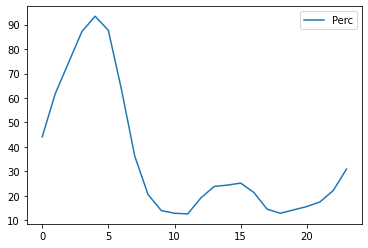

In [27]:
pd.DataFrame({"Time": missingValues.keys(), "Perc":[i[0] for i in missingValues.values()]}).plot()

In [28]:
pd.DataFrame({"Time": missingValues.keys(), "Perc":[i[0] for i in missingValues.values()]}).sort_values("Perc", ascending = False)

,Time,Perc
4,04:00:00,93.424658
5,05:00:00,87.671233
3,03:00:00,87.123288
2,02:00:00,74.520548
6,06:00:00,63.287671
1,01:00:00,61.917808
0,00:00:00,44.109589
7,07:00:00,36.164384
23,23:00:00,30.958904
15,15:00:00,25.205479


In [29]:
averages = {}
for col in df.columns:
    averages[col] = [
            np.mean(np.array(df[col])),
        np.mean(np.array(interpolateDfLinear[col])),
        np.mean(np.array(interpolateDfTime[col]))
    ]

<AxesSubplot:>

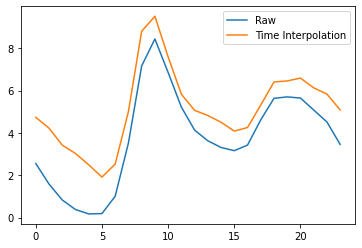

In [30]:
from matplotlib.pyplot import figure


pd.DataFrame({"TimeStamp":averages.keys()
              ,"Raw":[i[0] for i in averages.values()]
#               ,"Linear Interpolation":[i[1] for i in averages.values()]
              ,"Time Interpolation":[i[2] for i in averages.values()]
             }).plot()

In [31]:
%cd "/Users/vishnutammishetti/Advance Project/FlexibilityData"

/Users/vishnutammishetti/Advance Project/FlexibilityData


In [32]:
interpolateDfLinear.to_csv("interpolateDfLinear.csv")
interpolateDfTime.to_csv("interpolateDfTime.csv")

# Average Replace

In [33]:
dfAverageFill = df.copy()

In [34]:
dfAverageFill.head()

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
2019-01-01,0.000000,3.250489,3.299464,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,4.416822,3.838969,2.500578,0.889003,4.452825,7.286048,15.483550,13.194495,2.082059,6.263580
2019-01-02,6.887260,6.887260,6.887260,1.704597,0.000000,0.0,0.0,0.000000,3.803428,5.390000,...,0.200202,1.480429,2.754286,1.408165,6.405930,9.405160,10.947682,7.728424,7.014205,3.503205
2019-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.201210,2.846237,7.608958,...,6.023230,0.000000,0.000000,1.589649,4.327756,9.193494,10.059291,11.579663,13.085476,12.792488
2019-01-04,8.331980,3.183740,3.183740,3.183740,2.372771,0.0,0.0,2.980271,4.543188,4.553022,...,3.028430,0.000000,0.000000,2.990681,8.223368,10.660707,10.022091,3.645186,8.395692,6.363844
2019-01-05,0.585013,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.236389,0.000000,...,0.000000,3.550512,11.398530,11.468159,6.495711,2.350000,0.000000,0.000000,0.000000,0.000000


In [35]:
averages = {}
for col in dfAverageFill.columns:
    averages[col] = np.mean(np.array(dfAverageFill[col]))

In [36]:
for idx, row in dfAverageFill.iterrows():
    for col in dfAverageFill.columns:
        if dfAverageFill.loc[idx][col] == 0.0:
            dfAverageFill.loc[idx][col] = averages[col]

In [37]:
dfAverageFill

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
2019-01-01,2.555822,3.250489,3.299464,0.380723,0.174831,0.191219,1.011077,3.525675,7.161987,8.436928,...,4.416822,3.838969,2.500578,0.889003,4.452825,7.286048,15.483550,13.194495,2.082059,6.263580
2019-01-02,6.887260,6.887260,6.887260,1.704597,0.174831,0.191219,1.011077,3.525675,3.803428,5.390000,...,0.200202,1.480429,2.754286,1.408165,6.405930,9.405160,10.947682,7.728424,7.014205,3.503205
2019-01-03,2.555822,1.584592,0.832559,0.380723,0.174831,0.191219,1.011077,1.201210,2.846237,7.608958,...,6.023230,3.161670,3.425158,1.589649,4.327756,9.193494,10.059291,11.579663,13.085476,12.792488
2019-01-04,8.331980,3.183740,3.183740,3.183740,2.372771,0.191219,1.011077,2.980271,4.543188,4.553022,...,3.028430,3.161670,3.425158,2.990681,8.223368,10.660707,10.022091,3.645186,8.395692,6.363844
2019-01-05,0.585013,1.584592,0.832559,0.380723,0.174831,0.191219,1.011077,3.525675,0.236389,8.436928,...,3.312796,3.550512,11.398530,11.468159,6.495711,2.350000,5.646861,5.082652,4.517761,3.458680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,4.308571,1.882606,0.832559,0.380723,0.174831,0.191219,1.011077,3.525675,2.543606,2.816667,...,6.440288,4.814866,3.425158,4.617507,6.526750,8.747692,16.903700,7.641760,4.517761,3.458680
2019-12-28,4.461540,9.843845,9.843845,9.843845,9.336958,3.995146,2.099671,3.525675,7.161987,8.436928,...,9.793429,3.087073,3.425158,0.886451,3.959127,9.826169,5.516640,5.082652,4.517761,3.458680
2019-12-29,2.555822,1.584592,0.832559,0.380723,0.174831,0.191219,1.011077,3.525675,0.348902,2.101111,...,3.709880,0.701880,3.425158,5.255601,6.857616,6.857616,2.913770,17.293025,14.397778,1.865683
2019-12-30,2.555822,1.584592,0.832559,0.380723,0.174831,0.191219,1.011077,0.103889,16.106045,13.336122,...,5.559966,7.707651,7.175233,3.881662,1.778193,1.711161,10.285245,6.046069,6.208571,6.908721


In [38]:
averages = {}
for col in df.columns:
    averages[col] = [
            np.mean(np.array(df[col])),
        np.mean(np.array(dfAverageFill[col]))
    ]
    

<AxesSubplot:>

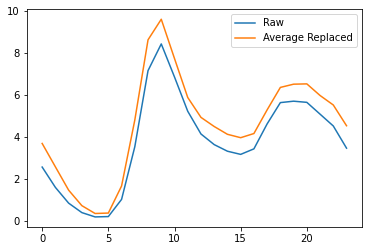

In [39]:
from matplotlib.pyplot import figure


pd.DataFrame({"TimeStamp":averages.keys()
              ,"Raw":[i[0] for i in averages.values()]
              
              ,"Average Replaced":[i[1] for i in averages.values()]
             }).plot()

In [40]:
dfAverageFill.to_csv("dfAverageFill.csv")

# Median Replace

In [41]:
dfMedianFill = df.copy()

In [42]:
dfMedianFill.head()

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
2019-01-01,0.000000,3.250489,3.299464,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,4.416822,3.838969,2.500578,0.889003,4.452825,7.286048,15.483550,13.194495,2.082059,6.263580
2019-01-02,6.887260,6.887260,6.887260,1.704597,0.000000,0.0,0.0,0.000000,3.803428,5.390000,...,0.200202,1.480429,2.754286,1.408165,6.405930,9.405160,10.947682,7.728424,7.014205,3.503205
2019-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.201210,2.846237,7.608958,...,6.023230,0.000000,0.000000,1.589649,4.327756,9.193494,10.059291,11.579663,13.085476,12.792488
2019-01-04,8.331980,3.183740,3.183740,3.183740,2.372771,0.0,0.0,2.980271,4.543188,4.553022,...,3.028430,0.000000,0.000000,2.990681,8.223368,10.660707,10.022091,3.645186,8.395692,6.363844
2019-01-05,0.585013,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.236389,0.000000,...,0.000000,3.550512,11.398530,11.468159,6.495711,2.350000,0.000000,0.000000,0.000000,0.000000


In [43]:
medians = {}
for col in dfMedianFill.columns:
    medians[col] = np.median(np.array(dfMedianFill[col]))

In [44]:
for idx, row in dfMedianFill.iterrows():
    for col in dfMedianFill.columns:
        if dfMedianFill.loc[idx][col] == 0.0:
            dfMedianFill.loc[idx][col] = medians[col]

In [45]:
dfMedianFill

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
2019-01-01,1.293143,3.250489,3.299464,0.000000,0.000000,0.000000,0.000000,1.522222,5.486106,6.561143,...,4.416822,3.838969,2.500578,0.889003,4.452825,7.286048,15.483550,13.194495,2.082059,6.263580
2019-01-02,6.887260,6.887260,6.887260,1.704597,0.000000,0.000000,0.000000,1.522222,3.803428,5.390000,...,0.200202,1.480429,2.754286,1.408165,6.405930,9.405160,10.947682,7.728424,7.014205,3.503205
2019-01-03,1.293143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.201210,2.846237,7.608958,...,6.023230,2.106029,2.713936,1.589649,4.327756,9.193494,10.059291,11.579663,13.085476,12.792488
2019-01-04,8.331980,3.183740,3.183740,3.183740,2.372771,0.000000,0.000000,2.980271,4.543188,4.553022,...,3.028430,2.106029,2.713936,2.990681,8.223368,10.660707,10.022091,3.645186,8.395692,6.363844
2019-01-05,0.585013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.522222,0.236389,6.561143,...,2.303877,3.550512,11.398530,11.468159,6.495711,2.350000,4.231248,3.700120,3.280000,2.664615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,4.308571,1.882606,0.000000,0.000000,0.000000,0.000000,0.000000,1.522222,2.543606,2.816667,...,6.440288,4.814866,2.713936,3.634002,6.526750,8.747692,16.903700,7.641760,3.280000,2.664615
2019-12-28,4.461540,9.843845,9.843845,9.843845,9.336958,3.995146,2.099671,1.522222,5.486106,6.561143,...,9.793429,3.087073,2.713936,0.886451,3.959127,9.826169,5.516640,3.700120,3.280000,2.664615
2019-12-29,1.293143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.522222,0.348902,2.101111,...,3.709880,0.701880,2.713936,5.255601,6.857616,6.857616,2.913770,17.293025,14.397778,1.865683
2019-12-30,1.293143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103889,16.106045,13.336122,...,5.559966,7.707651,7.175233,3.881662,1.778193,1.711161,10.285245,6.046069,6.208571,6.908721


In [46]:
averages = {}
for col in df.columns:
    averages[col] = [
            np.mean(np.array(df[col])),
        np.median(np.array(dfMedianFill[col]))
    ]
    

<AxesSubplot:>

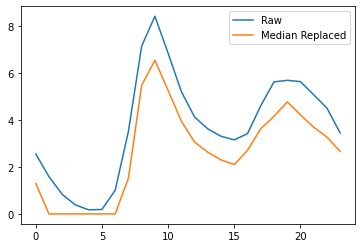

In [47]:
pd.DataFrame({"TimeStamp":averages.keys()
              ,"Raw":[i[0] for i in averages.values()]
              
              ,"Median Replaced":[i[1] for i in averages.values()]
             }).plot()

In [48]:
dfMedianFill.to_csv("dfMedianFill.csv")

# Fill with average of the day

In [49]:
dfDayAverageFill = df.copy()

In [50]:
averagesByDay = {}
for idx, row in dfDayAverageFill.iterrows():
    averagesByDay[idx] = np.mean(np.array(row))

In [51]:
averagesByDay

{datetime.date(2019, 1, 1): 3.05655091252665,
 datetime.date(2019, 1, 2): 4.0541532992444855,
 datetime.date(2019, 1, 3): 3.7938545465573017,
 datetime.date(2019, 1, 4): 4.177838130441137,
 datetime.date(2019, 1, 5): 1.564346409178123,
 datetime.date(2019, 1, 6): 1.5806773488196508,
 datetime.date(2019, 1, 7): 3.21285121114963,
 datetime.date(2019, 1, 8): 4.723960360570362,
 datetime.date(2019, 1, 9): 3.3486596878937838,
 datetime.date(2019, 1, 10): 3.1169022350239124,
 datetime.date(2019, 1, 11): 1.4911495267142143,
 datetime.date(2019, 1, 12): 2.1042932489886144,
 datetime.date(2019, 1, 13): 3.2382592340051155,
 datetime.date(2019, 1, 14): 3.921787583040111,
 datetime.date(2019, 1, 15): 2.800280382150365,
 datetime.date(2019, 1, 16): 1.9730556840513964,
 datetime.date(2019, 1, 17): 4.248876845837498,
 datetime.date(2019, 1, 18): 4.225501190014902,
 datetime.date(2019, 1, 19): 3.1002843830833426,
 datetime.date(2019, 1, 20): 3.405169889355882,
 datetime.date(2019, 1, 21): 5.3068413852

In [52]:
for idx, row in dfDayAverageFill.iterrows():
    for col in df.columns:
        if dfDayAverageFill.loc[idx][col] == 0.0:
            dfDayAverageFill.loc[idx][col] = averagesByDay[idx]

In [53]:
dfDayAverageFill

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
2019-01-01,3.056551,3.250489,3.299464,3.056551,3.056551,3.056551,3.056551,3.056551,3.056551,3.056551,...,4.416822,3.838969,2.500578,0.889003,4.452825,7.286048,15.483550,13.194495,2.082059,6.263580
2019-01-02,6.887260,6.887260,6.887260,1.704597,4.054153,4.054153,4.054153,4.054153,3.803428,5.390000,...,0.200202,1.480429,2.754286,1.408165,6.405930,9.405160,10.947682,7.728424,7.014205,3.503205
2019-01-03,3.793855,3.793855,3.793855,3.793855,3.793855,3.793855,3.793855,1.201210,2.846237,7.608958,...,6.023230,3.793855,3.793855,1.589649,4.327756,9.193494,10.059291,11.579663,13.085476,12.792488
2019-01-04,8.331980,3.183740,3.183740,3.183740,2.372771,4.177838,4.177838,2.980271,4.543188,4.553022,...,3.028430,4.177838,4.177838,2.990681,8.223368,10.660707,10.022091,3.645186,8.395692,6.363844
2019-01-05,0.585013,1.564346,1.564346,1.564346,1.564346,1.564346,1.564346,1.564346,0.236389,1.564346,...,1.564346,3.550512,11.398530,11.468159,6.495711,2.350000,1.564346,1.564346,1.564346,1.564346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,4.308571,1.882606,3.304966,3.304966,3.304966,3.304966,3.304966,3.304966,2.543606,2.816667,...,6.440288,4.814866,3.304966,3.304966,6.526750,8.747692,16.903700,7.641760,3.304966,3.304966
2019-12-28,4.461540,9.843845,9.843845,9.843845,9.336958,3.995146,2.099671,3.825060,3.825060,3.825060,...,9.793429,3.087073,3.825060,0.886451,3.959127,9.826169,5.516640,3.825060,3.825060,3.825060
2019-12-29,3.284326,3.284326,3.284326,3.284326,3.284326,3.284326,3.284326,3.284326,0.348902,2.101111,...,3.709880,0.701880,3.284326,5.255601,6.857616,6.857616,2.913770,17.293025,14.397778,1.865683
2019-12-30,4.722997,4.722997,4.722997,4.722997,4.722997,4.722997,4.722997,0.103889,16.106045,13.336122,...,5.559966,7.707651,7.175233,3.881662,1.778193,1.711161,10.285245,6.046069,6.208571,6.908721


In [54]:
averages = {}
for col in df.columns:
    averages[col] = [
            np.mean(np.array(df[col])),
        np.mean(np.array(dfDayAverageFill[col]))
    ]
    

<AxesSubplot:>

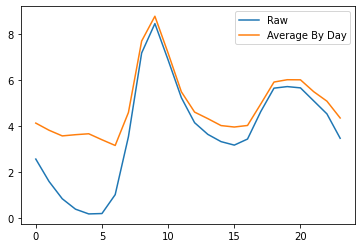

In [55]:
pd.DataFrame({"TimeStamp":averages.keys()
              ,"Raw":[i[0] for i in averages.values()]
              
              ,"Average By Day":[i[1] for i in averages.values()]
             }).plot()

In [56]:
dfDayAverageFill.to_csv("dfDayAverageFill.csv")

# Checking zeros distribution

In [57]:
numZeros = 0

for idx, row in df.iterrows():
    numZeros += list(row).count(0.0)

In [58]:
numZeros

3103

In [59]:
zerosPercentage = {}
for idx, row in df.iterrows():
    zerosPercentage[idx] = (list(row).count(0.0) / numZeros) * 100

In [60]:
li = list(zerosPercentage.values())

In [61]:
for idx in range(1, len(li)):
    li[idx] += li[idx - 1]

<AxesSubplot:>

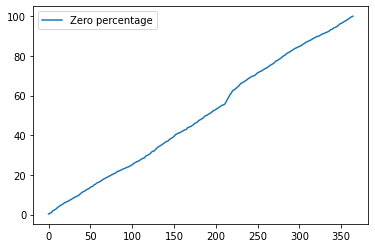

In [62]:
pd.DataFrame({"Time" : zerosPercentage.keys(), "Zero percentage" : li}).plot()

# To Model

In [63]:
df

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
2019-01-01,0.000000,3.250489,3.299464,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.416822,3.838969,2.500578,0.889003,4.452825,7.286048,15.483550,13.194495,2.082059,6.263580
2019-01-02,6.887260,6.887260,6.887260,1.704597,0.000000,0.000000,0.000000,0.000000,3.803428,5.390000,...,0.200202,1.480429,2.754286,1.408165,6.405930,9.405160,10.947682,7.728424,7.014205,3.503205
2019-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.201210,2.846237,7.608958,...,6.023230,0.000000,0.000000,1.589649,4.327756,9.193494,10.059291,11.579663,13.085476,12.792488
2019-01-04,8.331980,3.183740,3.183740,3.183740,2.372771,0.000000,0.000000,2.980271,4.543188,4.553022,...,3.028430,0.000000,0.000000,2.990681,8.223368,10.660707,10.022091,3.645186,8.395692,6.363844
2019-01-05,0.585013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.236389,0.000000,...,0.000000,3.550512,11.398530,11.468159,6.495711,2.350000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,4.308571,1.882606,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.543606,2.816667,...,6.440288,4.814866,0.000000,0.000000,6.526750,8.747692,16.903700,7.641760,0.000000,0.000000
2019-12-28,4.461540,9.843845,9.843845,9.843845,9.336958,3.995146,2.099671,0.000000,0.000000,0.000000,...,9.793429,3.087073,0.000000,0.886451,3.959127,9.826169,5.516640,0.000000,0.000000,0.000000
2019-12-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.348902,2.101111,...,3.709880,0.701880,0.000000,5.255601,6.857616,6.857616,2.913770,17.293025,14.397778,1.865683
2019-12-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103889,16.106045,13.336122,...,5.559966,7.707651,7.175233,3.881662,1.778193,1.711161,10.285245,6.046069,6.208571,6.908721


In [64]:
df.index = pd.to_datetime(df.index)

In [65]:
i = int(0.8 * len(df))

In [66]:
baseLinePreds = {}
for idx in df.columns:
    baseLinePreds[idx] = np.mean(df[:i][idx])

In [67]:
baseLinePreds

{'00:00:00': 2.443707211479029,
 '01:00:00': 1.4394850173342852,
 '02:00:00': 0.7444603272564002,
 '03:00:00': 0.33463794747436476,
 '04:00:00': 0.13131168043545127,
 '05:00:00': 0.17464914063861403,
 '06:00:00': 1.1103722009719956,
 '07:00:00': 3.849561001836133,
 '08:00:00': 7.16146289218108,
 '09:00:00': 7.749926681495937,
 '10:00:00': 6.138361851451675,
 '11:00:00': 4.944202750316406,
 '12:00:00': 4.029340129013801,
 '13:00:00': 3.3693021561117886,
 '14:00:00': 2.96973045951462,
 '15:00:00': 2.7959377941640313,
 '16:00:00': 3.3079096861759525,
 '17:00:00': 4.604357231250712,
 '18:00:00': 5.375696182996479,
 '19:00:00': 5.263525151537008,
 '20:00:00': 5.061694592916905,
 '21:00:00': 4.65662966025925,
 '22:00:00': 4.272081256675247,
 '23:00:00': 3.364531792703978}

In [68]:
list(df.iloc[i + 1])

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 10.753119405717506,
 28.901237384776334,
 23.91636206236988,
 8.127085295365433,
 6.3875,
 0.8137744444444444,
 2.836,
 2.836,
 0.6065888888888888,
 2.382564814814815,
 3.061111111111111,
 0.8624347676107481,
 3.691173186978141,
 11.309985414516689,
 14.264174004116388,
 9.611711021463345,
 3.3352884751655987]

In [69]:
basePredsDf = pd.DataFrame({"TimeStamp" : baseLinePreds.keys()
              , "Predicted" : baseLinePreds.values()
              , "Actual" : list(df.iloc[i + 1])
             
             })

In [70]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [71]:
mean_absolute_error(basePredsDf["Actual"], basePredsDf["Predicted"])

3.769636346718238

In [72]:
mean_absolute_error(basePredsDf["Actual"], basePredsDf["Predicted"]) / np.mean(basePredsDf["Actual"])

0.676693376744948